# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [2]:
import sys
import os
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [3]:
import models as md
importlib.reload(md)
import preprocessing as pp
importlib.reload(pp)

<module 'preprocessing' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\preprocessing.py'>

In [4]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

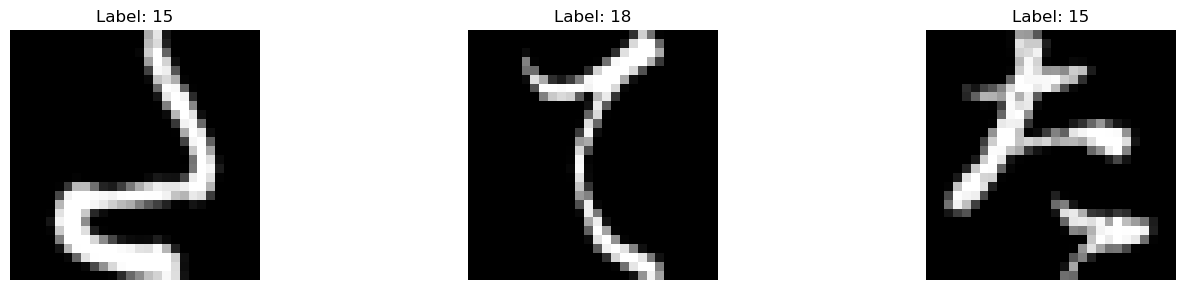

In [5]:
# Choose random pictures from X_images
num_images_to_display = 3
random_indices = np.random.choice(len(X_images), num_images_to_display, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_images[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [26]:
importlib.reload(pp)
# Split the data into train and temp (temporary set for further splitting)
X_normalized = pp.normalize(X_images)
X_train, X_val, X_test, y_train, y_val, y_test = pp.split_data(X_images, y_images)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### Implementación y Entrenamiento de una Red Neuronal Básica
- Implementar una red neuronal con L capas ocultas cada con M(l) nodos con función de activación ReLU (en las capas ocultas) y activación softmax para la capa de salida.
- Implementar un algoritmo para entrenar dicha red, mediante backpropagation y gradiente descendiente estándar, utilizando como función de costo la cross-entropy.

NOTA: El algoritmo backpropagation debe sera adaptado para el caso de clasificación multi-clase con función de activación softmax para la capa de salida y función de costo cross-entropy.

- Entrenar una red neuronal con 2 capas ocultas, con 100 y 80 nodos respectivamente, y graficar la evolución de la función de costo (cross-entropy) sobre los conjuntos de entrenamiento y validación a lo largo de las épocas. Llamaremos a este modelo M0

In [27]:
importlib.reload(md)

nn = md.NeuralNetwork(X_train, y_train, 2,["ReLU", "ReLU", "softmax"], [100,80])


Epoch 0, Loss: 18.055497419807185
Epoch 100, Loss: 17.960838195545215
Epoch 200, Loss: 17.866911319006576
Epoch 300, Loss: 17.82045426262268
Epoch 400, Loss: 17.75697951852286
Epoch 500, Loss: 17.690157168011726
Epoch 600, Loss: 17.596166932640998
Epoch 700, Loss: 17.50009137084993
Epoch 800, Loss: 17.40402126708832
Epoch 900, Loss: 17.314389461723504
